## Step 1: Search Stock Name
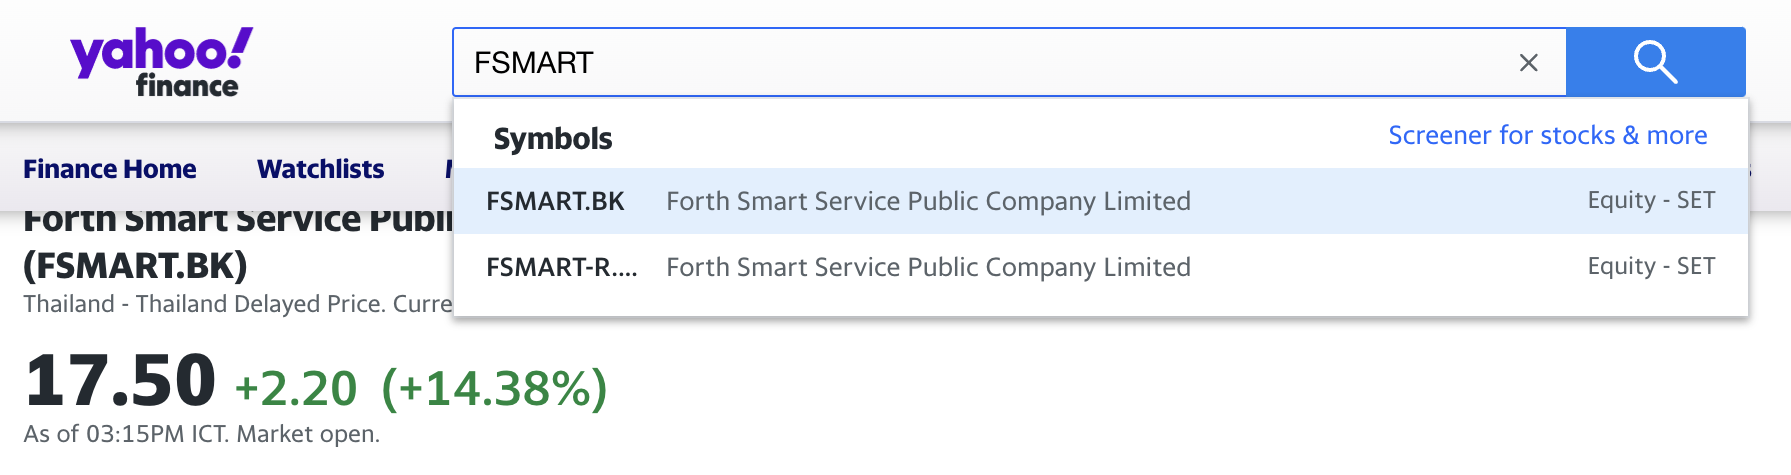

## Step 2: Historical Data and Choose 5Y time period
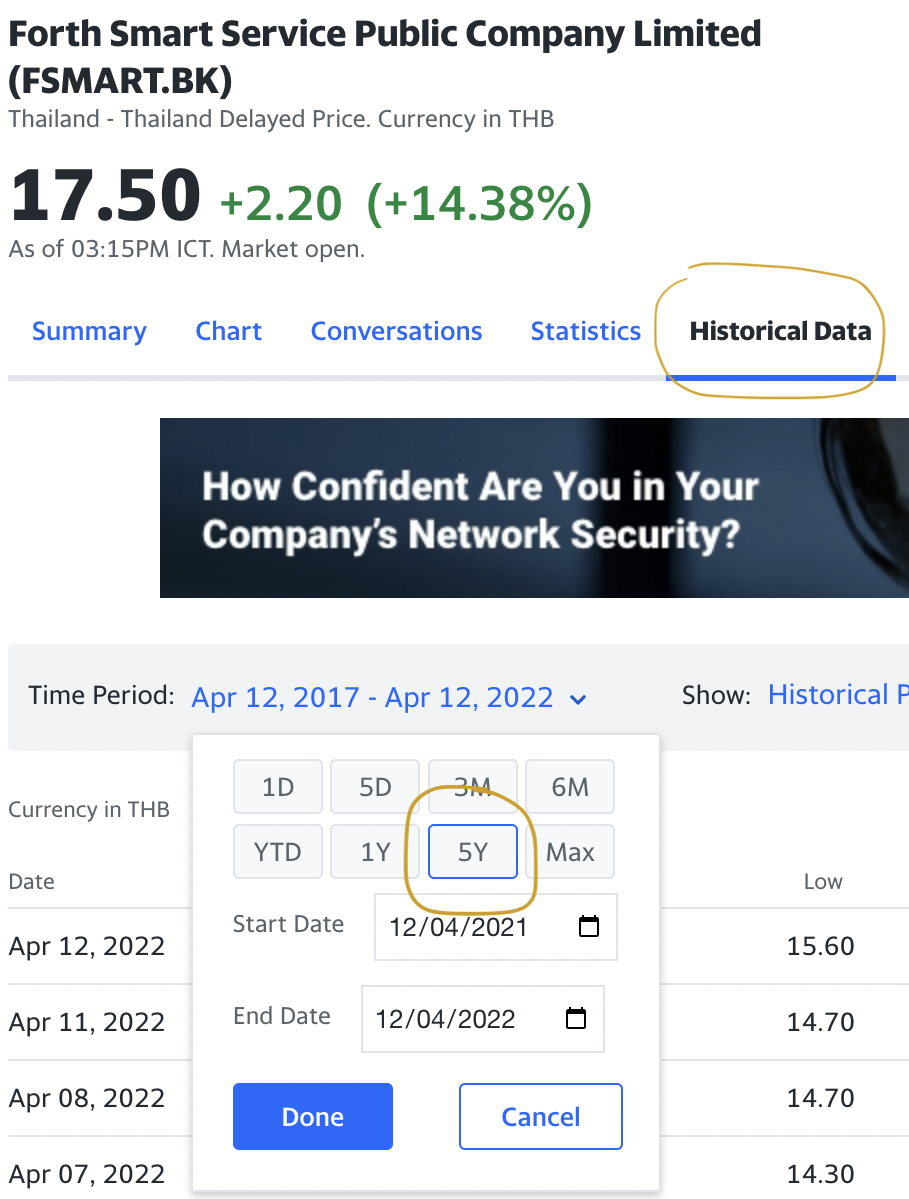

## Step 3: Copy the Link
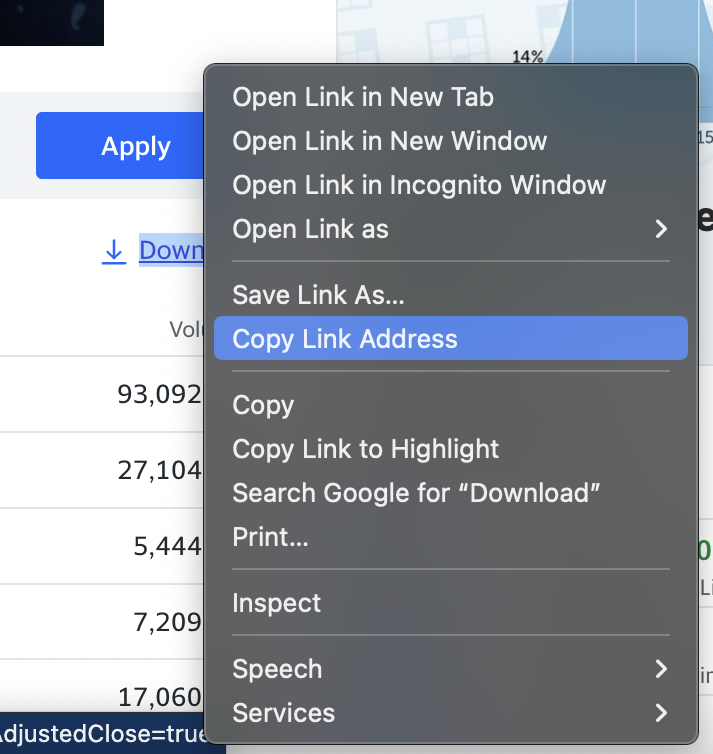

In [5]:
#EDIT INFO HERE
stock_title = 'FSMART'
#Link from YAHOO Only!
stock_link = 'https://query1.finance.yahoo.com/v7/finance/download/FSMART.BK?period1=1491955200&period2=1649721600&interval=1d&events=history&includeAdjustedClose=true'
date_split_train_test = '2022-02' # YYYY-MM (Where do you want to split prediction from train?)
step = 20 #to predict ahead (date_split_train_test shoud be valid with the step, ex; later than 2022-02 should be 20 or more days)

Metal device set to: Apple M1


2022-04-12 15:46:20.007734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 15:46:20.008108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-04-12 15:46:21.350806: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-12 15:46:21.434333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


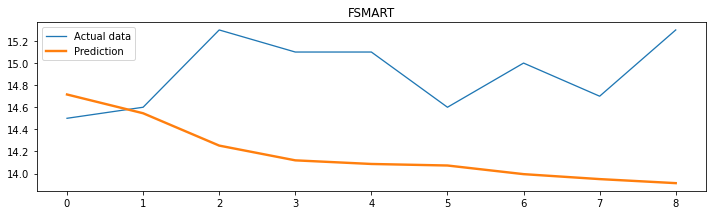

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

epochs = 50

df = pd.read_csv(stock_link, index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.Close
data = df.values.reshape(-1,1)
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)

def convertToMatrix(data, step=1):
    X, Y = [],[]
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,]) #Training data from i to i + d
        Y.append(data[d,]) #Target data d
    return np.array(X), np.array(Y)

n_train = df[:date_split_train_test].shape[0]
train, test = data_sc[0:n_train], data_sc[n_train:]
X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

model = tf.keras.models.load_model('stock_prediction_model/')
pred = model.predict(X_test)
pred_inv = sc.inverse_transform(pred)
y_test_inv = sc.inverse_transform(y_test)

plt.figure(figsize=(12,3.1))
plt.plot(y_test_inv, lw=1.3, label='Actual data')
plt.plot(pred_inv, lw=2.4, label='Prediction')
plt.title(stock_title)
plt.legend()
plt.show()